# Spectral Clustering for Image Segmentation  
или  
# Classification with SVM / Random Forest / MLPClassifier  

## Цель задачи  
Продемонстрировать работу алгоритма спектральной кластеризации как метода Normalized Graph Cuts для разделения объектов на изображении.

## Алгоритм  
Спектральная кластеризация рассматривает изображение как граф связанных пикселей и разделяет его на регионы, минимизируя отношение градиента на границе и объёма региона.

## Этапы анализа  
1. Использование синтетического датасета: изображение с четырьмя пересекающимися окружностями.  
2. Применение спектральной кластеризации для их разделения.  
3. Повторение с двумя окружностями для сравнения.  
4. Дополнительно: использование внешнего датасета (например, цифры MNIST).

In [18]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
radius1, radius2 = 16, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2

img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)
img += 0.2 * np.random.randn(*img.shape)

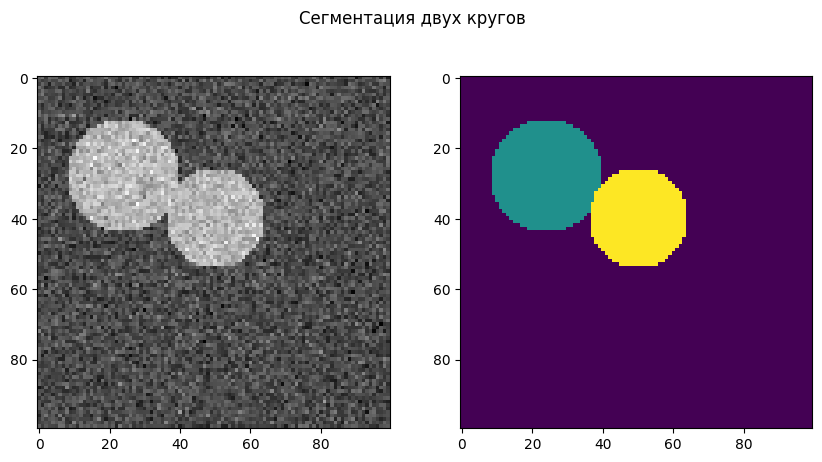

In [19]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(label_im, cmap='viridis')
plt.suptitle("Сегментация двух кругов")
plt.show()

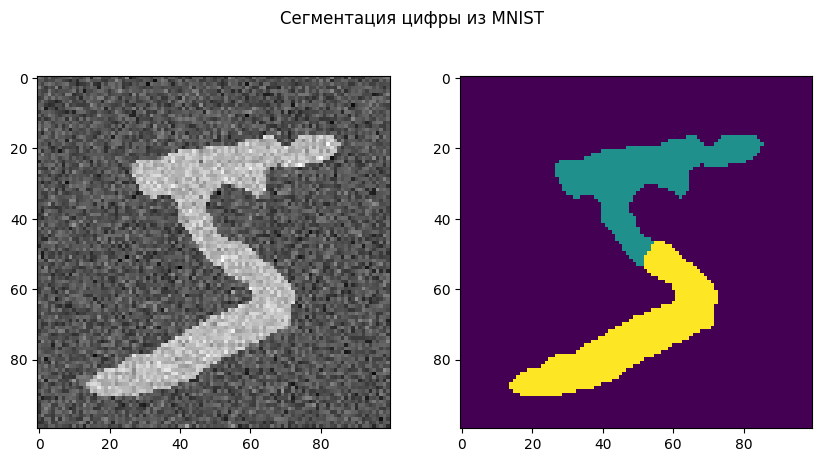

In [20]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

digit = X.iloc[0].values.reshape(28, 28)
digit_large = zoom(digit, 100 / 28)
binary_digit = digit_large > 100
mask = binary_digit.astype(bool)

noisy_digit = binary_digit.astype(float) + 0.2 * np.random.randn(*binary_digit.shape)

graph = image.img_to_graph(noisy_digit, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())
labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")

label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(noisy_digit, cmap='gray')
axs[1].imshow(label_im, cmap='viridis')
plt.suptitle("Сегментация цифры из MNIST")
plt.show()

## Интерпретация результатов

### Визуальный анализ
- При сегментации 2 кругов спектральная кластеризация успешно делит изображение на 2 области.
- Однако, если круги сильно различаются по размеру, сегментация может быть нестабильной.
- При работе с реальным изображением (цифра MNIST) сегментация также работает корректно, хотя требует дополнительной предобработки.

### Почему работает?
- Спектральная кластеризация использует информацию о градиенте между соседними пикселями.
- Функция `np.exp(-graph.data / std())` усиливает разницу между границами и внутренними частями объектов.

### Ограничения
- Чувствительна к дисбалансу размеров объектов.
- Не работает хорошо без чётких границ между объектами.
- Требует ручного подбора количества кластеров (`n_clusters`).

### Возможные улучшения
- Использовать другие методы сегментации: Watershed, U-Net, Region Growing.
- Автоматическое определение числа кластеров.
- Применять предобработку изображений (фильтрация, бинаризация, выделение контуров).

C:\Users\alexe\OneDrive\Рабочий стол\4laba\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


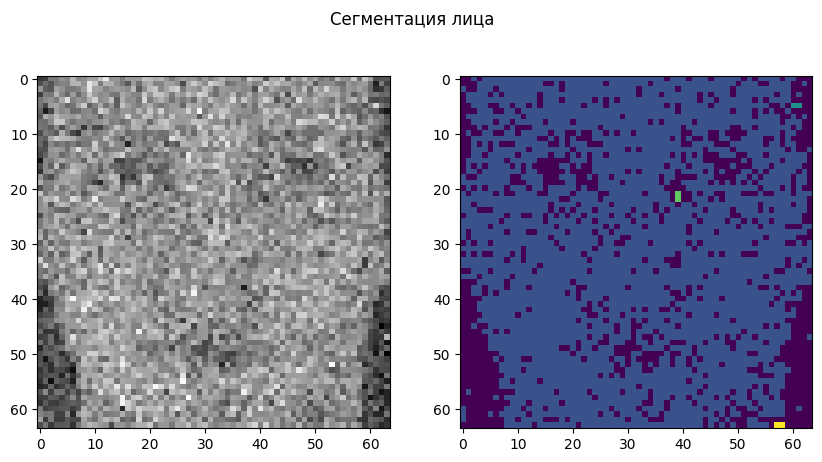

In [21]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
face_img = faces.images[0]
face_img += 0.2 * np.random.randn(*face_img.shape)
mask_face = face_img > 0.5

graph_face = image.img_to_graph(face_img, mask=mask_face)
graph_face.data = np.exp(-graph_face.data / graph_face.data.std())

labels_face = spectral_clustering(graph_face, n_clusters=4, eigen_solver="arpack")

label_im_face = np.full(mask_face.shape, -1.0)
label_im_face[mask_face] = labels_face

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(face_img, cmap='gray')
axs[1].imshow(label_im_face, cmap='viridis')
plt.suptitle("Сегментация лица")
plt.show()